## 1. Problem Statement


This notebooks explores or analyses the data from the FIFA 2018 data set . This includes performing __Exploratory Data Analysis__ by __cleaning, loading, inspecting, exploring, determining relationship__ between the data and __finding patterns__ from the data.


The main goal is to __predict the no. of wins__ using the best suitable model.

## 2. Dataset (Loading, Description):


 - __Code to Display the logo__

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving 2018-FIFA-World-Cup-Widescreen-Wallpaper-34015-1170x658 (1).jpg to 2018-FIFA-World-Cup-Widescreen-Wallpaper-34015-1170x658 (1) (2).jpg


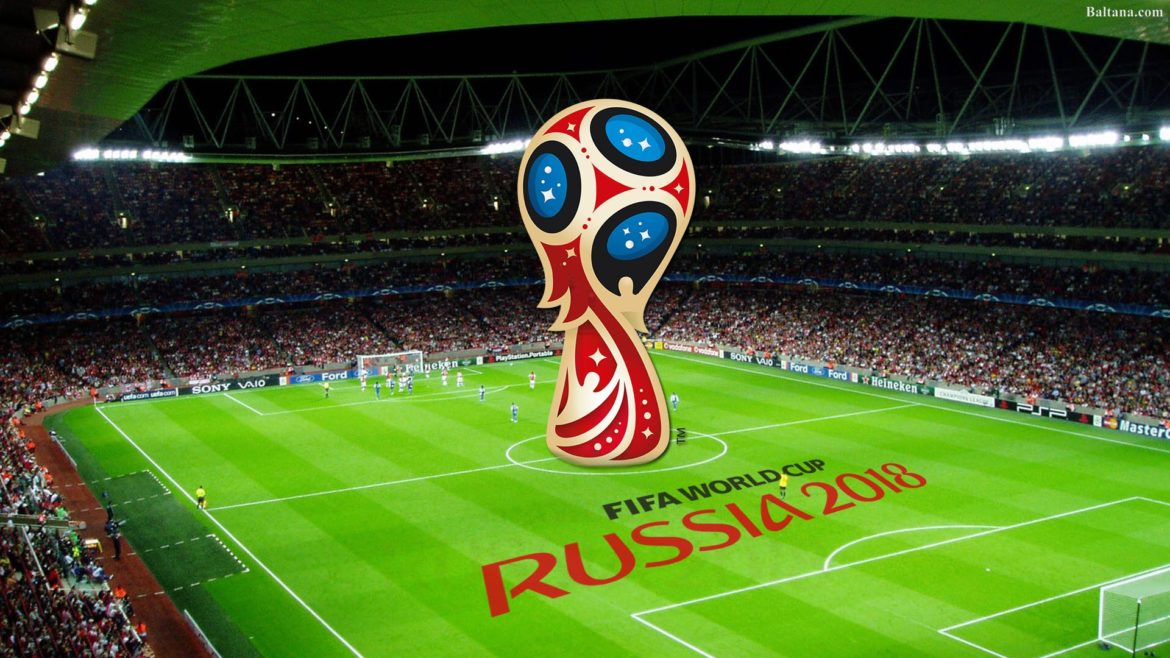

In [0]:
Image('2018-FIFA-World-Cup-Widescreen-Wallpaper-34015-1170x658 (1) (2).jpg',width=700)

- The Dataset consists of details about all the matches played in FIFA 2018 Football World Cup. Details such Team, Oponent, number of goals scored, ball posession and penalty shootout etc.etc. are given.
- The Dataset comprises of __128 observations and 27 columns__. Below is the table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Date | Match Date
| Team | Playing Team |
| Opponent | Opponent Team |
| Goal Scored | Number of goals scored by this team |
| Ball Possession | %Amount of time ball was in control by the team |
| Attempts | Number of attempts to score goal |
| On | TargetNumber of shots on-target |
| Off | TargetNumber of shots that went off-target |
| Blocked | Number of opponent team's attempts blocked by the team |
| Corners | Number of corner shots used |
| Offsides | Number of off-side events |
| Free Kicks | Number of free-kicks used |
| SavesNumber | saves by the goal keeper |
| Pass Accuracy | %Percentage of passes that reached the same team player as aimed |
| Passes | Total number of passes by the team |
| Distance Covered (Kms) | Total distance covered by the team members in this game |
| Fouls Committed | Number of fouls committed by the team members |
| Yellow Card | Number of Yellow warning received |
| Yellow & Red | Number of Yellow & Red warning received |
| Red | Number of Red cards received |
| Man of the Match | Did this team member win Man of the Match? |
| 1st Goal | When did the team score the 1st goal? |
| Round | Stage of the match |
| PSO | Was there a penalty shootout (PSO) in this match? |
| Goals in PSO | Number of goals scored in the Penalty shootout |
| Own goals | Number of own goals |
| Own goal Time | When did the team score own goal? |

__Importing packages__

In [0]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

import numpy as np

%matplotlib inline

__Importing the dataset__

In [0]:
  fifa_data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')
  fifa_data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


### 2.1. Exploratory Data analysis

In [0]:
fifa_data.shape

(128, 27)

In [0]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

In [0]:
fifa_data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


__Observations__
- Most of the goals are scored in last quartile i.e approx. in the last 20 minutes of the game ?
- Does the team posessing the ball for more time scores more goals ?
- There is a good amount of variance for all the columns in the last quartile ?

In [0]:
fifa_data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

- There are null values for the columns __1st Goal, Own goals and Own goal time__
- So, better we drop them as they dont hold any significance here.

### 2.2. Preprocessing of the data


- Add a column winner to indicate the winning team.
- Dropping the column __1st Goal__ as too many missing values.
- Dropping the columns __Own goals__ and __Own goal Time__ as these does hold any significance on the number of goals scored or the winning teams.


In [0]:
# Here, in football Man of the match is given to the player who is typically on the Winning side.
# So, identifying the winner based on the Man of the match column
fifa_data['Winner'] = fifa_data['Man of the Match']

In [0]:
fifa_data = pd.get_dummies(fifa_data,columns = ['Winner'], drop_first = True)

In [0]:
fifa_data.drop(['1st Goal','Own goals','Own goal Time','Man of the Match'], axis=1, inplace=True)

In [0]:
fifa_data.head()

In [0]:
fifa_data.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Round', 'PSO', 'Goals in PSO', 'Winner_Yes'],
      dtype='object')

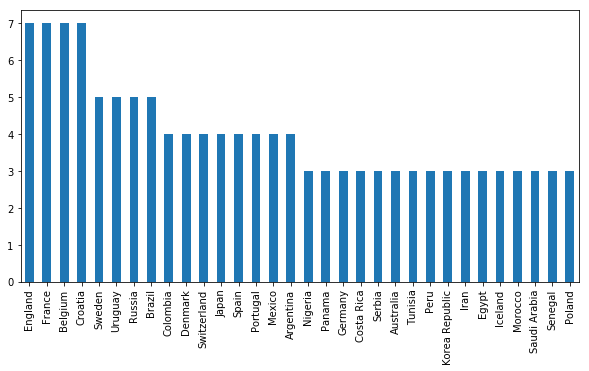

In [0]:
# Plotting a bar grapbh for no. of matches played by the team
f,ax=plt.subplots(figsize=(10,5))
fifa_data['Team'].value_counts().plot.bar(ax=ax)

- From the above graph we can infer that the teams reaching semi-finals and finals played more matches than the other team.
- So, we conclude that __Belgium, France, Croatia and England reached semi-finals.__

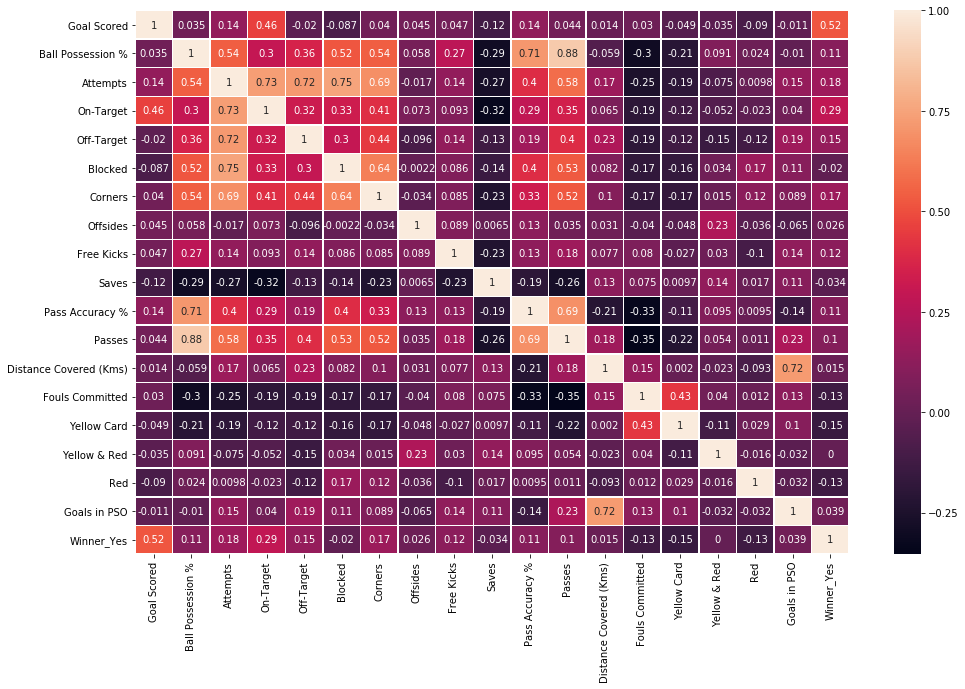

In [0]:
# Plotting a heatmap to see the correlations between the different fields
f,ax=plt.subplots(figsize=(16,10))
sns.heatmap(fifa_data.corr(),annot=True,linewidths=0.5, ax=ax)

- There is a __strong +ve correlation__ betwwen the __Goal Scored__ and __Winner_Yes__ columns i.e. __more the no. of goals scored the more the chances of winning the match__.
- There is a  __strong -ve correlation__ between the __saves__ and __Winner_Yes__ columns i.e. __more the no. of saves the less number of goals scored and changes of winning the match scoring less goals is very less.__

Drawing __pair plot__ to know the joint relationship between __'Goal Scored' , 'Ball Possession %' , 'Attempt' , 'Winner'__ etc.etc.

Text(0.5, 1.0, 'Pair Plot')

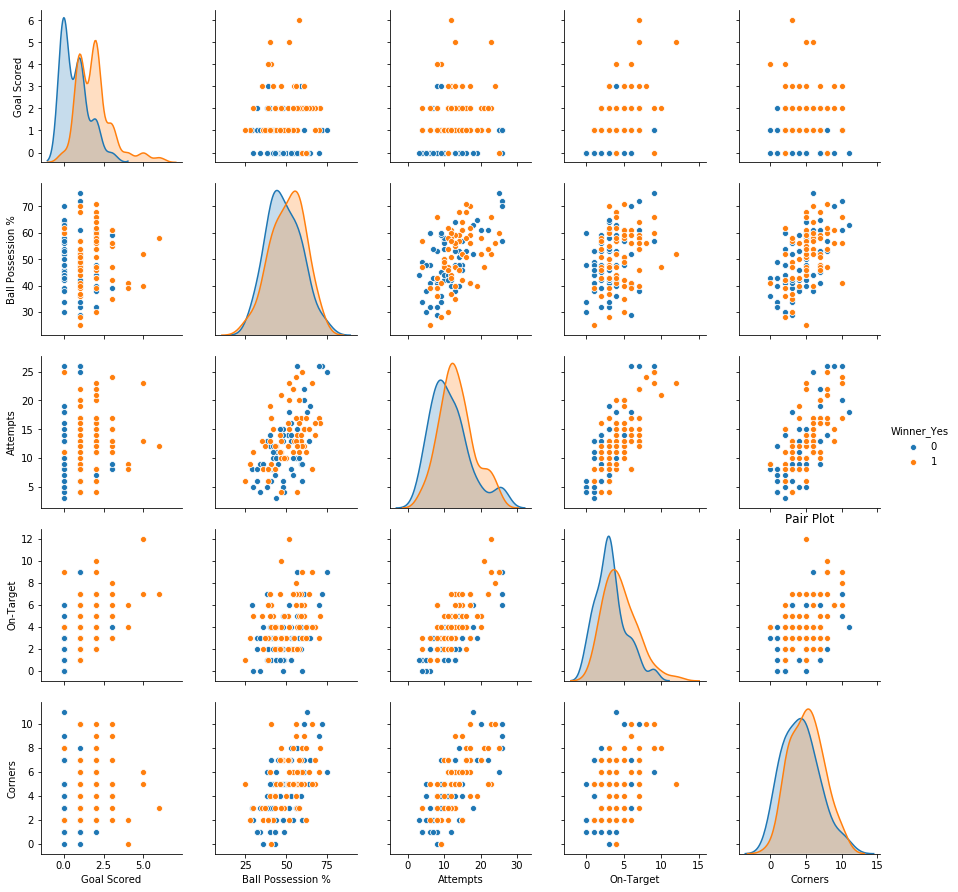

In [0]:
# Drawing the Pair plots
sns.pairplot(fifa_data[["Goal Scored","Ball Possession %","Attempts","On-Target","Corners","Winner_Yes"]],
             vars = ["Goal Scored","Ball Possession %","Attempts","On-Target","Corners"],hue="Winner_Yes")
plt.title('Pair Plot')

Drawing a Swarm plot to see the relation between __'On-Target','Ball Possession %','Goal Scored'__

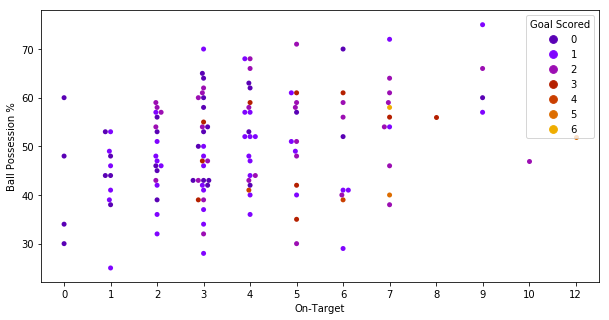

In [0]:
f,ax=plt.subplots(figsize=(10,5))
sns.swarmplot(x="On-Target", y="Ball Possession %", hue="Goal Scored", palette="gnuplot", data=fifa_data,ax=ax)

Drawing a Swarm plot to see the relation between __'Pass Accuracy %','Passess','Goal Scored'__

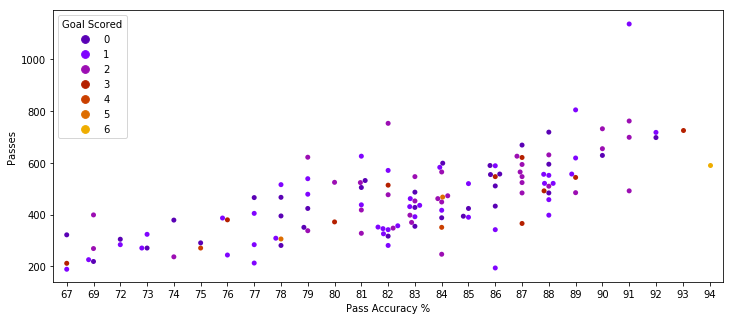

In [0]:
f,ax=plt.subplots(figsize=(12,5))
sns.swarmplot(x="Pass Accuracy %", y="Passes", hue="Goal Scored", palette="gnuplot", data=fifa_data,ax=ax)

- __When the no. of passes are between 200-600 more goals are scored.__
- __Too many passes does not contribute to more goals.__

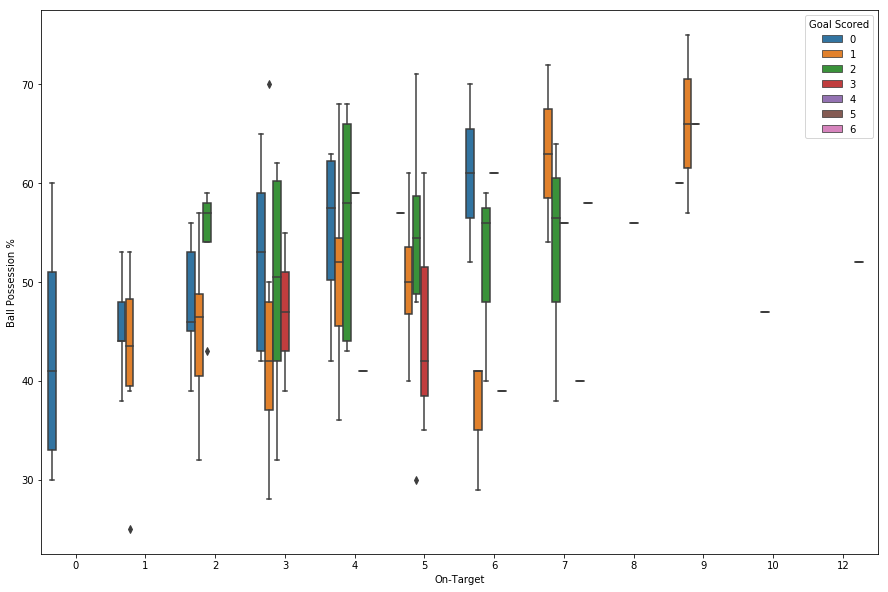

In [0]:
f,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x="On-Target", y="Ball Possession %", hue='Goal Scored', data=fifa_data, ax=ax)

In [0]:
fifa_data.head()

__Drop the non-numerical columns which are no more relevant from the analysis point of view__

In [0]:
fifa_data = fifa_data.drop(['Date','Team','Opponent','Round','PSO','Goals in PSO'], axis=1)
fifa_data.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Winner_Yes
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,1
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,1
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0


## 3. Preparing X and y using pandas

In [0]:
X = fifa_data.loc[:,fifa_data.columns != 'Winner_Yes']
X.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0


In [0]:
y=fifa_data.Winner_Yes

## 4. Splitting X and y into training and test datasets.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [0]:
print(X_train.shape)
print(y_train.shape)

(102, 17)
(102,)


## 5. Applying Logistics Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 5.1 Using the Model for Prediction

In [0]:
y_pred_train = logreg.predict(X_train)  

In [0]:
y_pred_test = logreg.predict(X_test)                                                           # make predictions on the testing set

### 5.2 Model Evaluation using __accuracy classification score__

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7307692307692307


### 5.3 Model Evaluation using confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

   0   1
0  9   4
1  3  10


In [0]:
confusion_matrix.index = ['Actual Lost','Actual Win']
confusion_matrix.columns = ['Predicted Lost','Predicted Win']
print(confusion_matrix)

             Predicted Lost  Predicted Win
Actual Lost               9              4
Actual Win                3             10


This means 9 + 10 = __19 correct predictions__ & 3 + 4 = __7 false predictions__.

__Adjusting Threshold__ for predicting Loses or Wins.

In [0]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.6538461538461539


The accuracy have been __reduced__ significantly changing from __0.73 to 0.65__. Hence, 0.75 is __not a good threshold__ for our model. 


In [0]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.6923076923076923


The accuracy have been __reduced__ significantly changing from __0.73 to 0.69__. Hence, 0.75 is __not a good threshold__ for our model. 


In [0]:
preds3 = np.where(logreg.predict_proba(X_test)[:,1]> 0.50,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds3))

Accuracy score for test data is: 0.7307692307692307


__The accuracy here matches exactly as shown by the model as the .predict method we used uses internally the same threshold i..e 0.50__

## 6. Conclusion

- Tried to apply different model on the above problem such as:
 - Logistics Regreesion
 - Decision trees
 - Decision trees with GridSearch
 - Random Forest
 - Random Forest with GridSearch.
- From the above models we see that the DT and RF with GridSearch gives us the same accuracy as we get by regression and a better confusion matrix results. 
- __So, we observe here that the Logistics Regression is the best suitable model as it provide the same accuracy that of DT and RF with Grid Search and is more Robust as it's accuracy does not change much with changes in the data.__